<a href="https://colab.research.google.com/github/patience275/marketing/blob/main/marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/marketing/ecommerce_customer_data (1).csv')
df.head()

,customer_id,name,email,age,gender,annual_income,total_purchases,avg_purchase_value,days_since_last_purchase,customer_satisfaction,churn
0,a3071abd-8922-4608-95af-676364cb411d,Erica Powers,houseariana@example.net,56,Male,41672,11,170.75,14,5,0
1,114a0236-61b3-4447-964c-dbe6ac3d0773,Sarah Jones,ufranklin@example.org,46,Female,78217,9,63.17,8,4,0
2,c2fcf312-df91-400a-ab0e-822c1fab051a,Jaime Peterson,james10@example.com,32,Female,28279,10,55.09,8,2,0
3,7885497e-eb68-4c32-b4a3-b110d6af8aae,Rebecca Wolfe,pricedustin@example.org,60,Female,17017,15,110.88,18,4,0
4,b212448f-04ae-4943-a90e-0c8500b486fc,Kenneth Peterson,qwyatt@example.net,25,Male,56600,10,158.37,42,3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               1000 non-null   object 
 1   name                      1000 non-null   object 
 2   email                     1000 non-null   object 
 3   age                       1000 non-null   int64  
 4   gender                    1000 non-null   object 
 5   annual_income             1000 non-null   int64  
 6   total_purchases           1000 non-null   int64  
 7   avg_purchase_value        1000 non-null   float64
 8   days_since_last_purchase  1000 non-null   int64  
 9   customer_satisfaction     1000 non-null   int64  
 10  churn                     1000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.1+ KB


In [4]:
df.isna().sum()

,0
customer_id,0
name,0
email,0
age,0
gender,0
annual_income,0
total_purchases,0
avg_purchase_value,0
days_since_last_purchase,0
customer_satisfaction,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.columns

Index(['customer_id', 'name', 'email', 'age', 'gender', 'annual_income',
       'total_purchases', 'avg_purchase_value', 'days_since_last_purchase',
       'customer_satisfaction', 'churn'],
      dtype='object')

In [7]:
df=df.drop(columns=['customer_id', 'name', 'email'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1000 non-null   int64  
 1   gender                    1000 non-null   object 
 2   annual_income             1000 non-null   int64  
 3   total_purchases           1000 non-null   int64  
 4   avg_purchase_value        1000 non-null   float64
 5   days_since_last_purchase  1000 non-null   int64  
 6   customer_satisfaction     1000 non-null   int64  
 7   churn                     1000 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


## age

In [9]:
df['age'].unique()

array([56, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61, 47,
       55, 50, 29, 42, 44, 59, 45, 33, 64, 54, 24, 26, 35, 21, 31, 43, 37,
       52, 34, 23, 51, 27, 48, 62, 58, 18, 22, 30, 49, 63])

In [10]:
age=df['age'].value_counts()
age

,count
age,
43,33
50,30
45,30
52,28
64,27
54,27
56,25
18,25
62,25


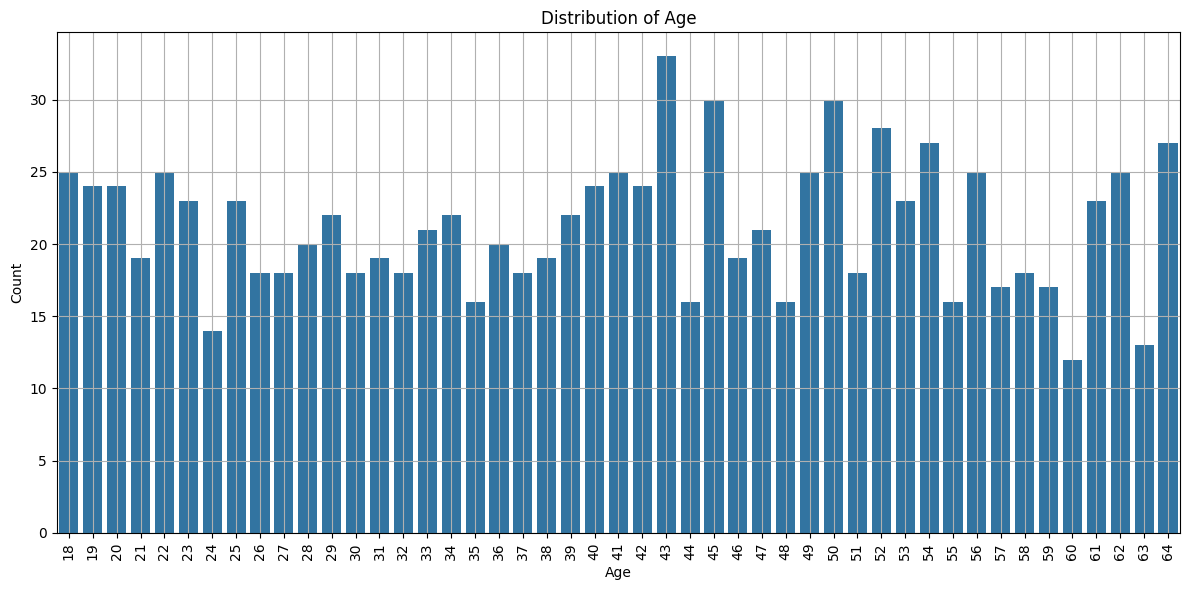

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=age.index, y=age.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

##gender


In [12]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

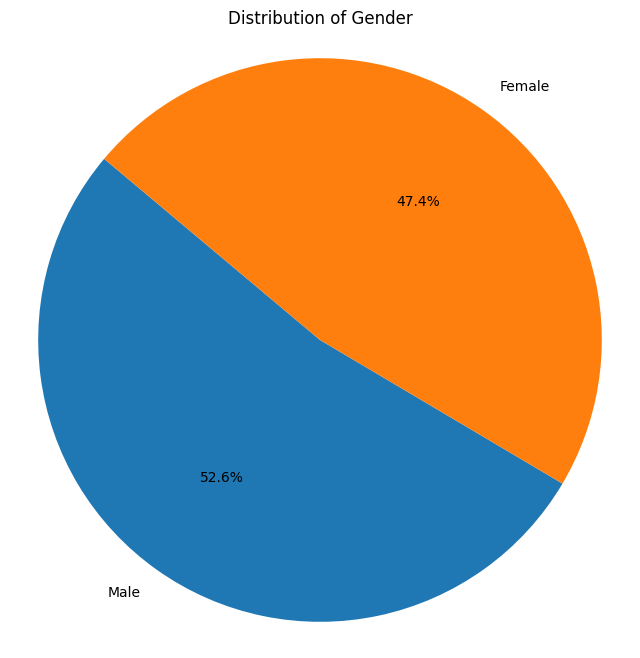

In [13]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

<Figure size 1400x700 with 0 Axes>

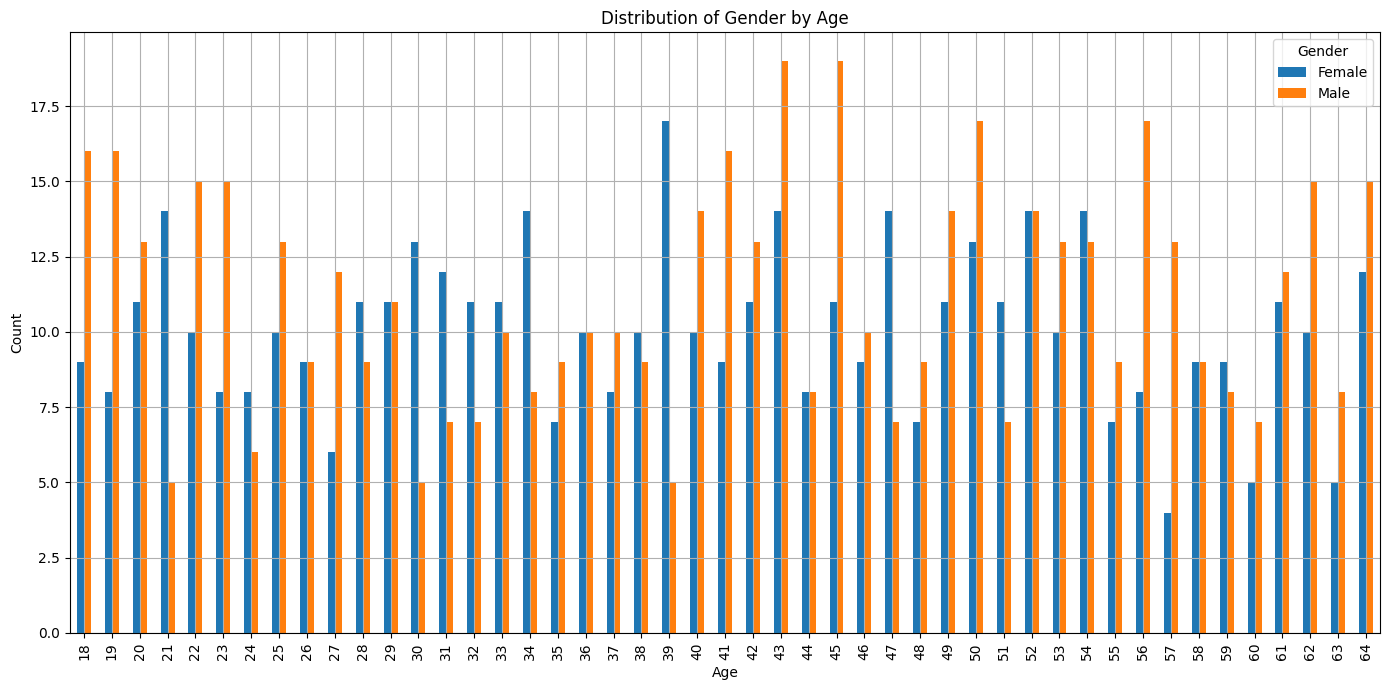

In [14]:
gender_age_counts = df.groupby('age')['gender'].value_counts().unstack().fillna(0)

plt.figure(figsize=(14, 7))
gender_age_counts.plot(kind='bar', stacked=False, figsize=(14, 7))
plt.title('Distribution of Gender by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

## annual income

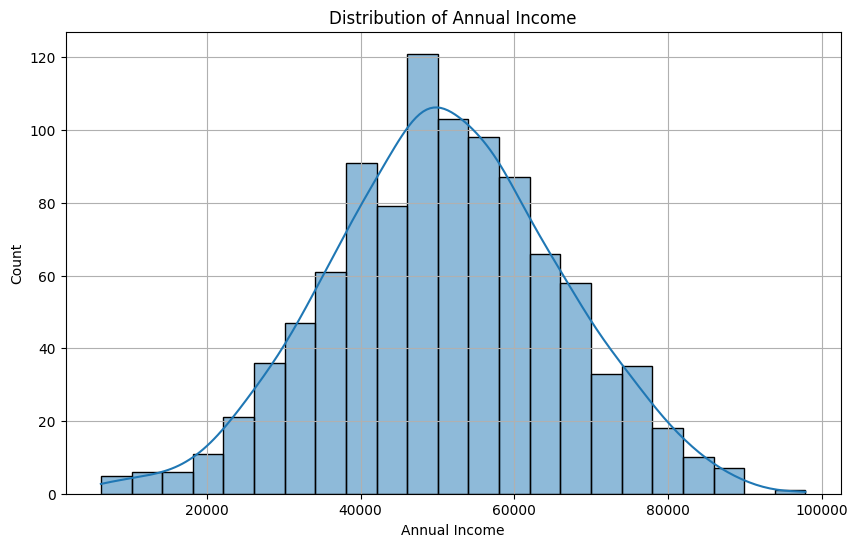

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='annual_income', kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.grid(True)
plt.show()

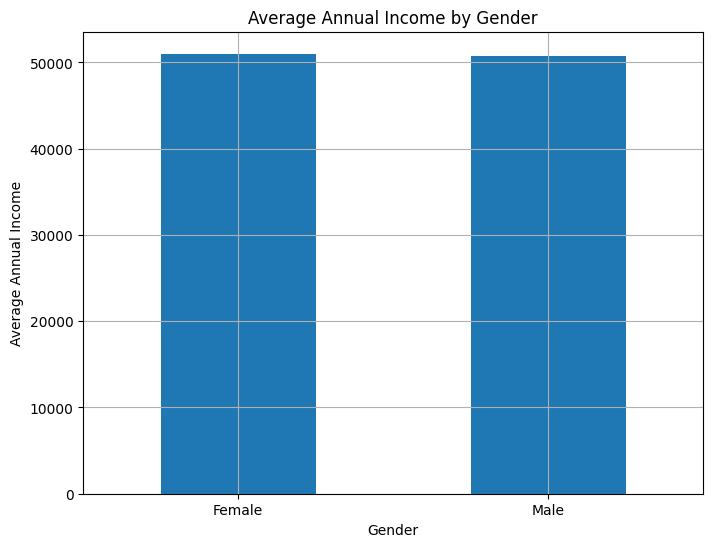

In [16]:
average_income_by_gender = df.groupby('gender')['annual_income'].mean()

plt.figure(figsize=(8, 6))
average_income_by_gender.plot(kind='bar')
plt.title('Average Annual Income by Gender')
plt.xlabel('Gender')
plt.grid(True)
plt.ylabel('Average Annual Income')
plt.xticks(rotation=0)
plt.show()

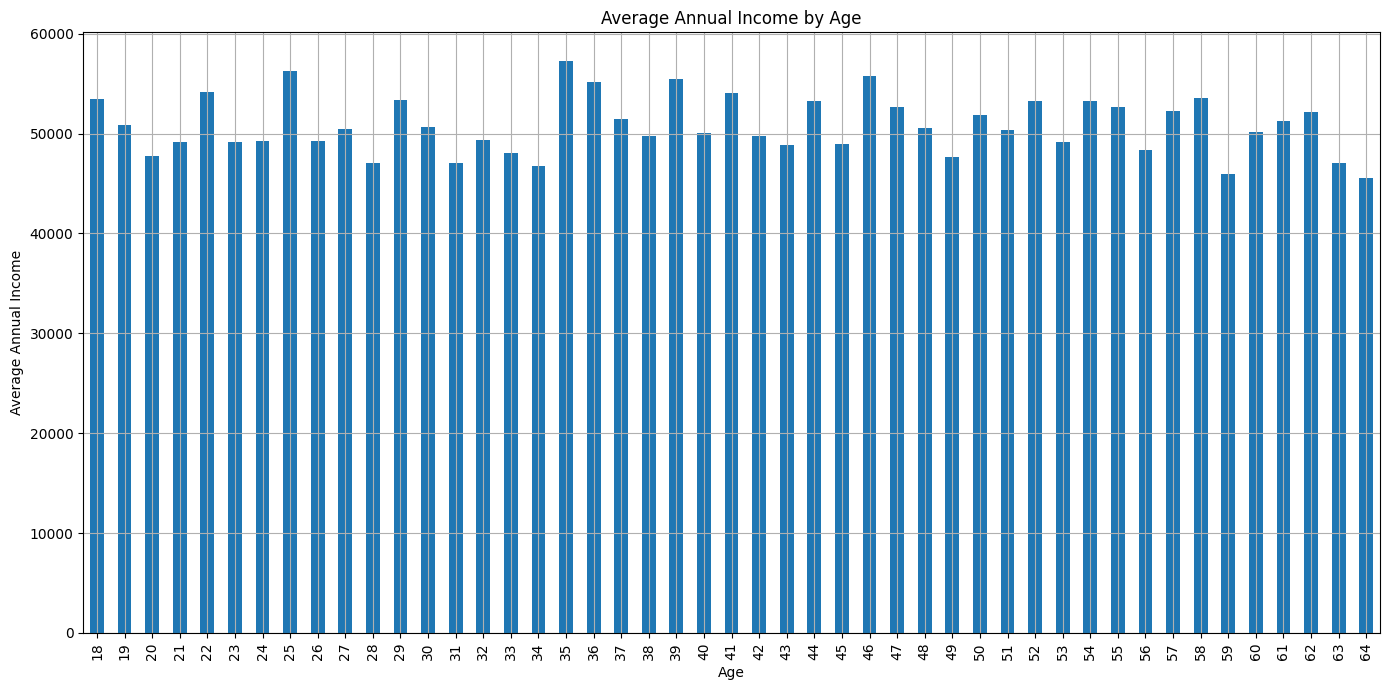

In [17]:
average_income_by_age = df.groupby('age')['annual_income'].mean()

plt.figure(figsize=(14, 7))
average_income_by_age.plot(kind='bar')
plt.title('Average Annual Income by Age')
plt.xlabel('Age')
plt.ylabel('Average Annual Income')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## total purchases

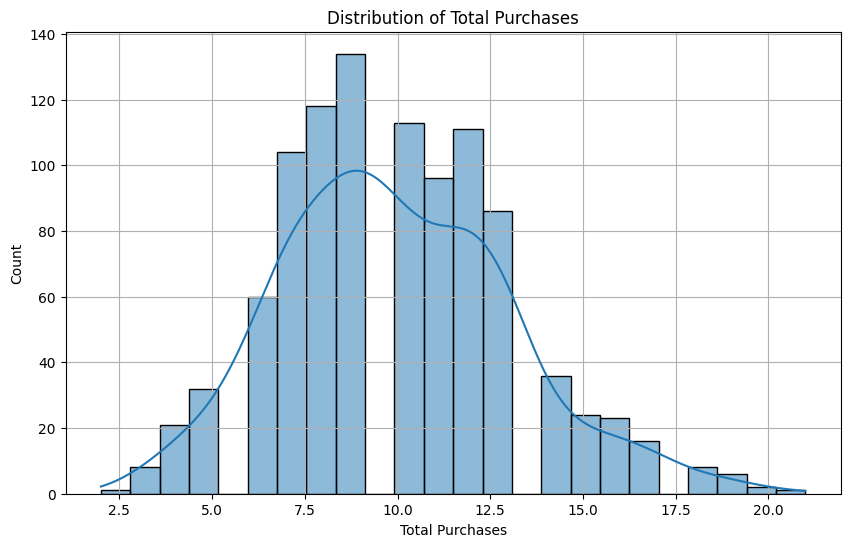

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_purchases', kde=True)
plt.title('Distribution of Total Purchases')
plt.xlabel('Total Purchases')
plt.grid(True)
plt.ylabel('Count')
plt.show()

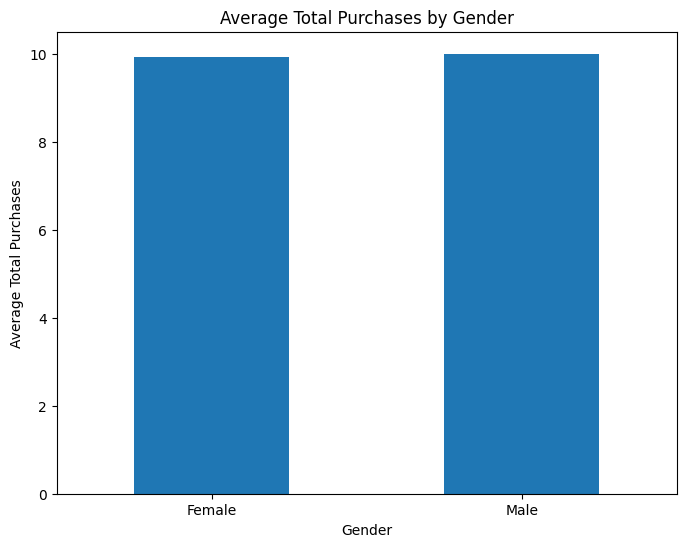

In [19]:
average_purchases_by_gender = df.groupby('gender')['total_purchases'].mean()

plt.figure(figsize=(8, 6))
average_purchases_by_gender.plot(kind='bar')
plt.title('Average Total Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Purchases')
plt.xticks(rotation=0)
plt.show()

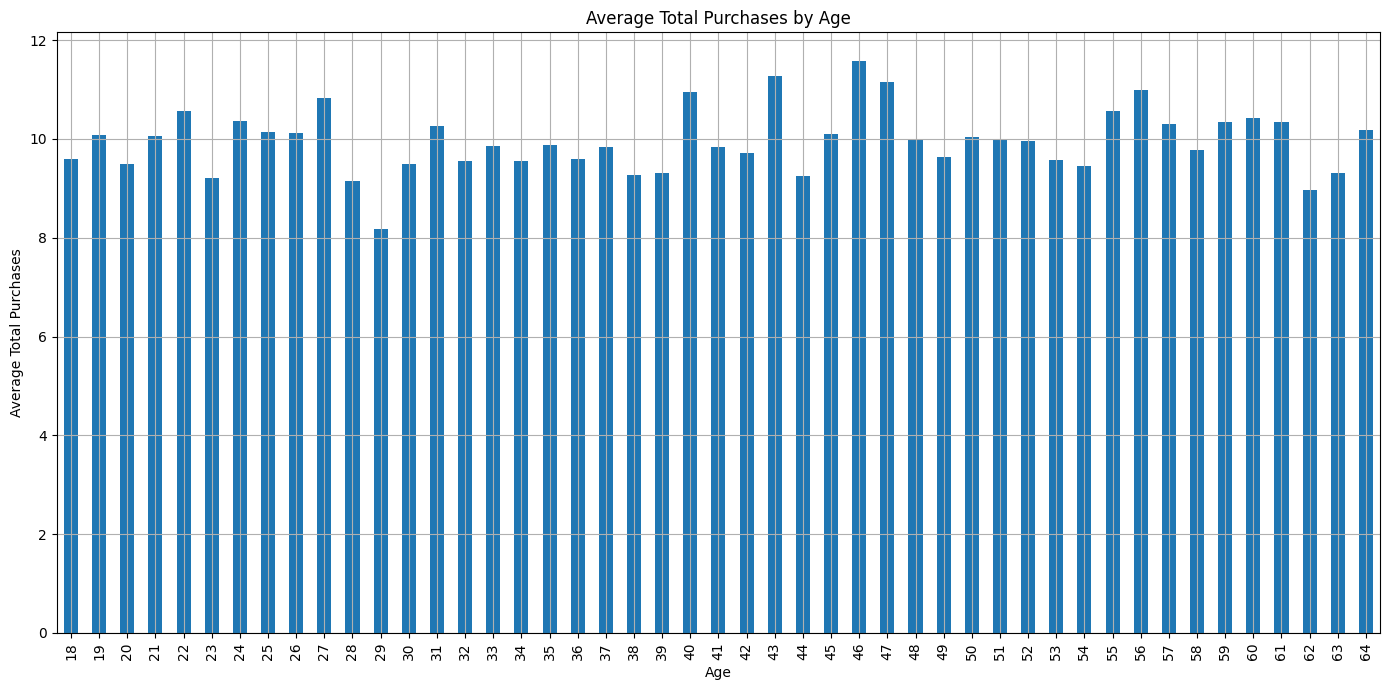

In [20]:
average_purchases_by_age = df.groupby('age')['total_purchases'].mean()

plt.figure(figsize=(14, 7))
average_purchases_by_age.plot(kind='bar')
plt.title('Average Total Purchases by Age')
plt.xlabel('Age')
plt.grid(True)
plt.ylabel('Average Total Purchases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## average purchase value

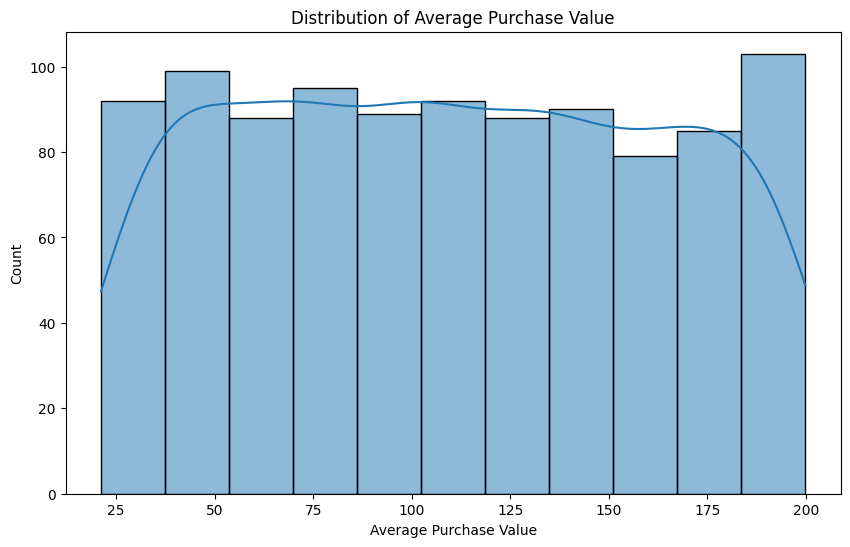

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='avg_purchase_value', kde=True)
plt.title('Distribution of Average Purchase Value')
plt.xlabel('Average Purchase Value')
plt.ylabel('Count')
plt.show()

## days since last purchase

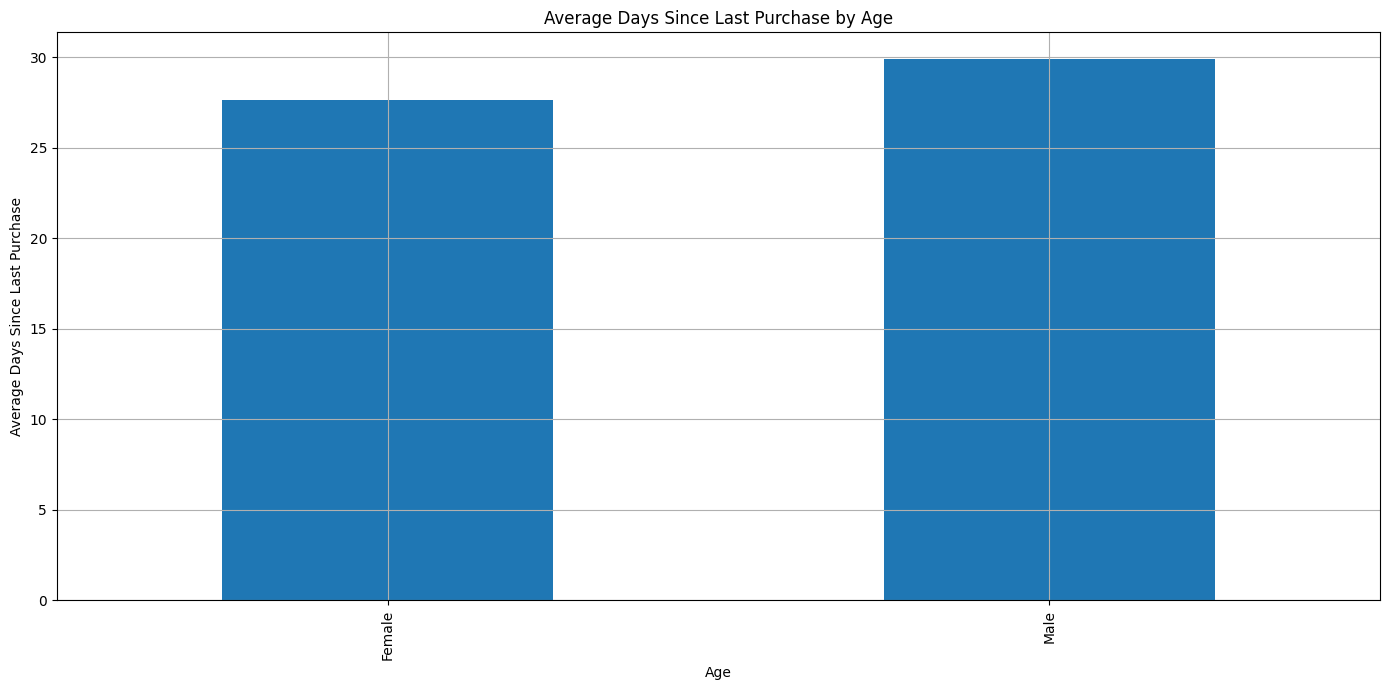

In [22]:
average_days_since_last_purchase_by_age = df.groupby('gender')['days_since_last_purchase'].mean()

plt.figure(figsize=(14, 7))
average_days_since_last_purchase_by_age.plot(kind='bar')
plt.title('Average Days Since Last Purchase by Age')
plt.xlabel('Age')
plt.grid(True)
plt.ylabel('Average Days Since Last Purchase')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

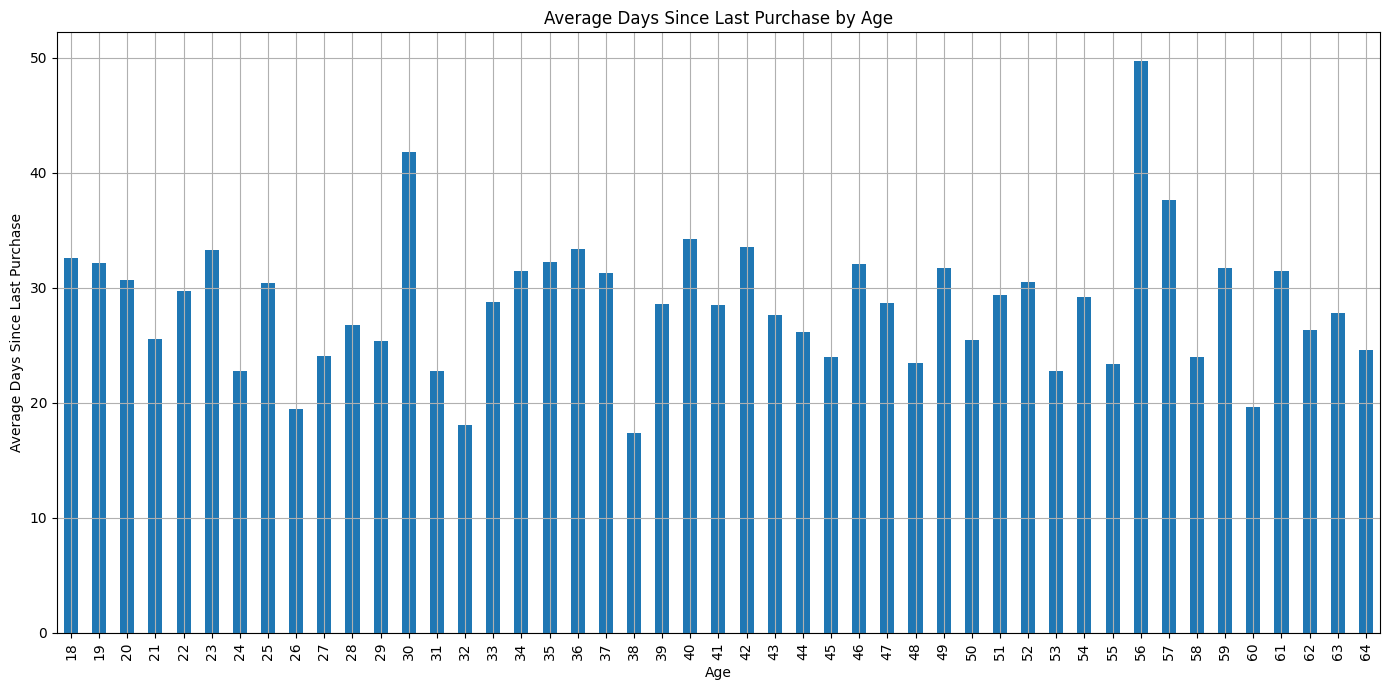

In [23]:
average_days_since_last_purchase_by_age = df.groupby('age')['days_since_last_purchase'].mean()

plt.figure(figsize=(14, 7))
average_days_since_last_purchase_by_age.plot(kind='bar')
plt.title('Average Days Since Last Purchase by Age')
plt.xlabel('Age')
plt.grid(True)
plt.ylabel('Average Days Since Last Purchase')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## customer satisfaction

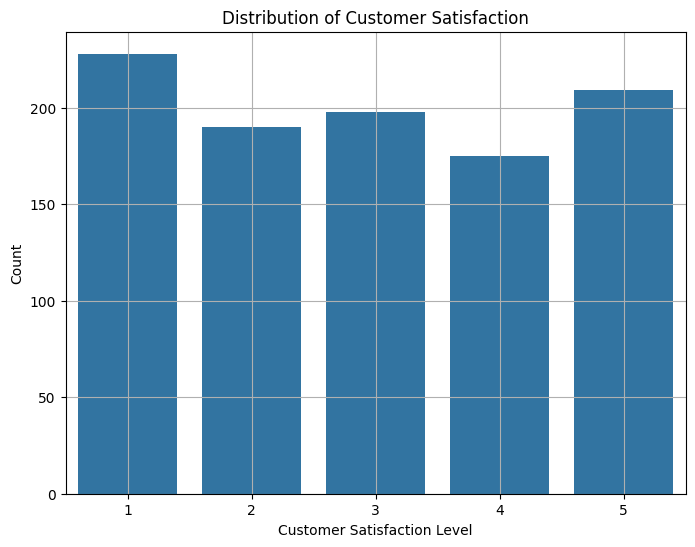

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='customer_satisfaction')
plt.title('Distribution of Customer Satisfaction')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()

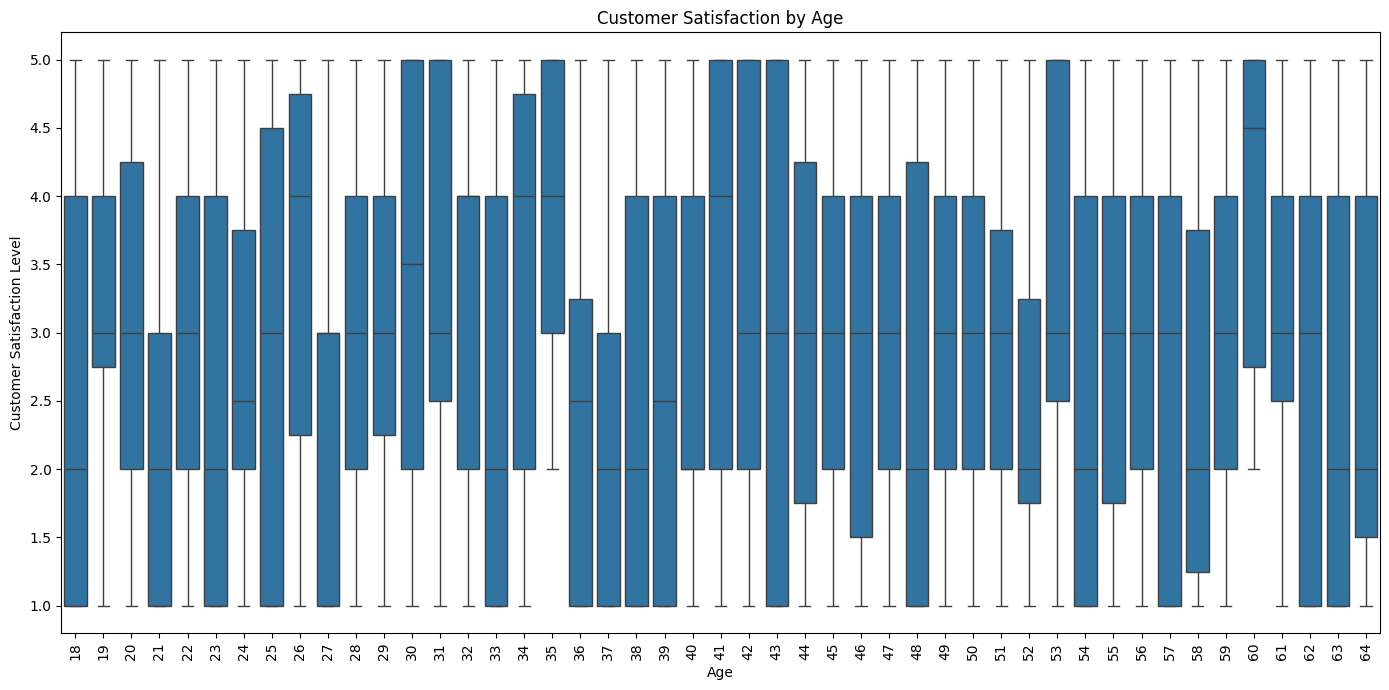

In [25]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='age', y='customer_satisfaction')
plt.title('Customer Satisfaction by Age')
plt.xlabel('Age')
plt.ylabel('Customer Satisfaction Level')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

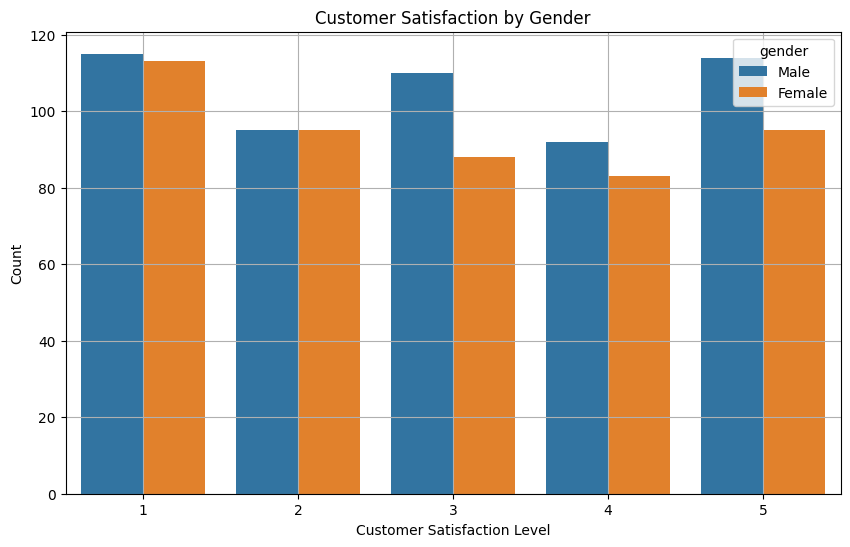

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='customer_satisfaction', hue='gender')
plt.title('Customer Satisfaction by Gender')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()

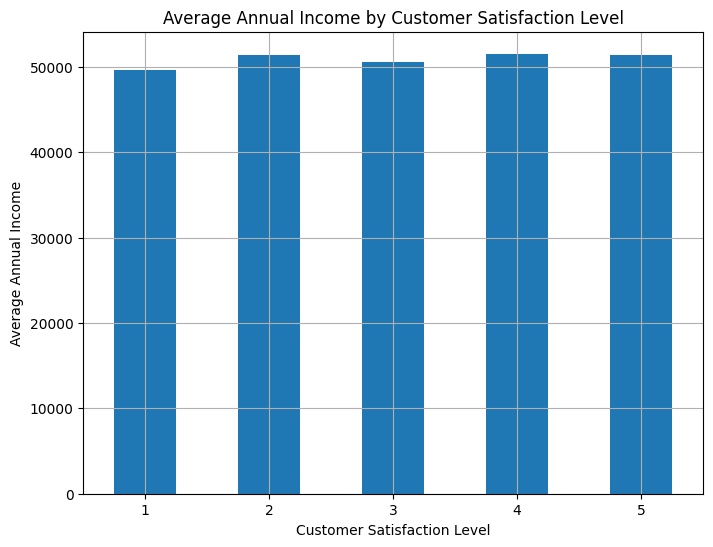

In [27]:
average_income_by_satisfaction = df.groupby('customer_satisfaction')['annual_income'].mean()

plt.figure(figsize=(8, 6))
average_income_by_satisfaction.plot(kind='bar')
plt.title('Average Annual Income by Customer Satisfaction Level')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Average Annual Income')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

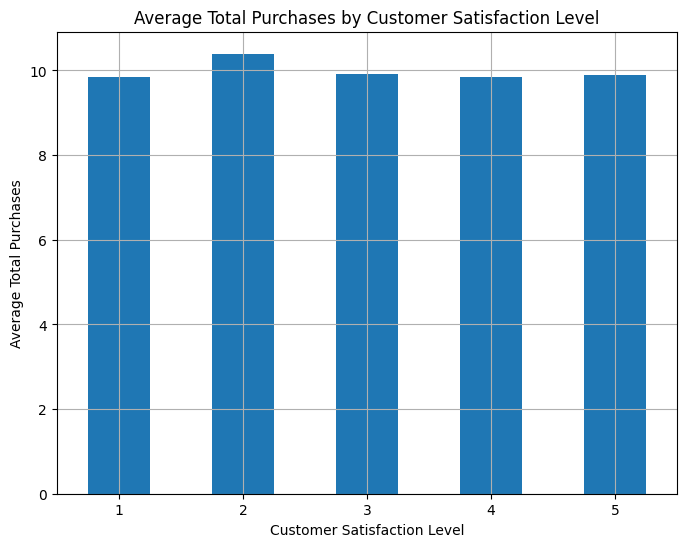

In [28]:
average_purchases_by_satisfaction = df.groupby('customer_satisfaction')['total_purchases'].mean()

plt.figure(figsize=(8, 6))
average_purchases_by_satisfaction.plot(kind='bar')
plt.title('Average Total Purchases by Customer Satisfaction Level')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Average Total Purchases')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

## churn

In [29]:
df['churn'].unique()

array([0, 1])

In [30]:
df['churn'].value_counts()

,count
churn,
0,690
1,310


## ex

In [31]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.02, random_state=42)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 549 to 102
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       980 non-null    int64  
 1   gender                    980 non-null    object 
 2   annual_income             980 non-null    int64  
 3   total_purchases           980 non-null    int64  
 4   avg_purchase_value        980 non-null    float64
 5   days_since_last_purchase  980 non-null    int64  
 6   customer_satisfaction     980 non-null    int64  
 7   churn                     980 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 68.9+ KB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 521 to 319
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       20 non-null     int64  
 1   gender                    20 non-null     object 
 2   annual_income             20 non-null     int64  
 3   total_purchases           20 non-null     int64  
 4   avg_purchase_value        20 non-null     float64
 5   days_since_last_purchase  20 non-null     int64  
 6   customer_satisfaction     20 non-null     int64  
 7   churn                     20 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 1.4+ KB


In [34]:
train.head()

,age,gender,annual_income,total_purchases,avg_purchase_value,days_since_last_purchase,customer_satisfaction,churn
549,49,Male,43438,13,124.84,4,2,1
174,28,Male,66622,12,32.38,28,3,1
371,57,Female,64880,8,94.01,11,1,0
527,58,Male,55717,16,102.67,11,5,1
210,49,Female,45536,8,27.09,90,3,0


In [35]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# OneHotEncode gender column
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(train[['gender']])

# Make encoded DataFrame with matching index
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['gender']),
    index=train.index
)

# Combine with original (drop 'gender' column)
train1 = pd.concat([train.drop('gender', axis=1), encoded_df], axis=1)


In [36]:
train1.head()

,age,annual_income,total_purchases,avg_purchase_value,days_since_last_purchase,customer_satisfaction,churn,gender_Female,gender_Male
549,49,43438,13,124.84,4,2,1,0.0,1.0
174,28,66622,12,32.38,28,3,1,0.0,1.0
371,57,64880,8,94.01,11,1,0,1.0,0.0
527,58,55717,16,102.67,11,5,1,0.0,1.0
210,49,45536,8,27.09,90,3,0,1.0,0.0


In [37]:
train1=train1.drop(columns=['gender_Female'])

In [38]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 549 to 102
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       980 non-null    int64  
 1   annual_income             980 non-null    int64  
 2   total_purchases           980 non-null    int64  
 3   avg_purchase_value        980 non-null    float64
 4   days_since_last_purchase  980 non-null    int64  
 5   customer_satisfaction     980 non-null    int64  
 6   churn                     980 non-null    int64  
 7   gender_Male               980 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 68.9 KB


In [39]:
train1=train1.rename(columns={'gender_Male':'gender'})

In [40]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 549 to 102
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       980 non-null    int64  
 1   annual_income             980 non-null    int64  
 2   total_purchases           980 non-null    int64  
 3   avg_purchase_value        980 non-null    float64
 4   days_since_last_purchase  980 non-null    int64  
 5   customer_satisfaction     980 non-null    int64  
 6   churn                     980 non-null    int64  
 7   gender                    980 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 68.9 KB


In [41]:
y_cols=train1['churn']

In [42]:
x_cols=train1.drop(columns=['churn'])

In [43]:
x_cols.head()

,age,annual_income,total_purchases,avg_purchase_value,days_since_last_purchase,customer_satisfaction,gender
549,49,43438,13,124.84,4,2,1.0
174,28,66622,12,32.38,28,3,1.0
371,57,64880,8,94.01,11,1,0.0
527,58,55717,16,102.67,11,5,1.0
210,49,45536,8,27.09,90,3,0.0


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_cols=pd.DataFrame(scaler.fit_transform(x_cols),columns=x_cols.columns)
x_cols.head()

,age,annual_income,total_purchases,avg_purchase_value,days_since_last_purchase,customer_satisfaction,gender
0,0.673913,0.406239,0.578947,0.580243,0.017778,0.25,1.0
1,0.217391,0.659016,0.526316,0.063042,0.124444,0.50,1.0
2,0.847826,0.640023,0.315789,0.407787,0.048889,0.00,0.0
3,0.869565,0.540118,0.736842,0.456229,0.048889,1.00,1.0
4,0.673913,0.429113,0.315789,0.033451,0.400000,0.50,0.0


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_cols,y_cols,test_size=0.4,random_state=42)

## model training

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [49]:
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
y_pred=lr.predict(x_val)
confusion=confusion_matrix(y_pred,y_val)
classification=classification_report(y_pred,y_val)
roc=roc_auc_score(y_val,y_pred)
scores=cross_val_score(lr,x_train,y_train,cv=5,scoring='roc_auc')
print('confusion_matrix:',confusion)
print('classification_report:',classification)
print('roc_auc_scores:',roc)
print('cross_val_scores:',scores)
print('mean scores:',scores.mean())

confusion_matrix: [[277 115]
 [  0   0]]
classification_report:               precision    recall  f1-score   support

           0       1.00      0.71      0.83       392
           1       0.00      0.00      0.00         0

    accuracy                           0.71       392
   macro avg       0.50      0.35      0.41       392
weighted avg       1.00      0.71      0.83       392

roc_auc_scores: 0.5
cross_val_scores: [0.43421053 0.47565789 0.42730263 0.53108108 0.49367089]
mean scores: 0.4723846039577218


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## balancing classes

In [65]:
!pip install imbalanced-learn --quiet

In [51]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x_train,y_train)

In [52]:
from sklearn.linear_model import LogisticRegression
lr2=LogisticRegression()
lr2.fit(x_resampled,y_resampled)

LogisticRegression()

In [66]:
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
y_pred2=lr2.predict(x_val)
confusion=confusion_matrix(y_pred2,y_val)
classification=classification_report(y_pred2,y_val)
roc=roc_auc_score(y_val,y_pred2)
scores=cross_val_score(lr2,x_resampled,y_resampled,cv=5,scoring='roc_auc')
print(confusion)
print(classification)
print(roc)
print(scores)
print(scores.mean())

[[135  54]
 [142  61]]
              precision    recall  f1-score   support

           0       0.49      0.71      0.58       189
           1       0.53      0.30      0.38       203

    accuracy                           0.50       392
   macro avg       0.51      0.51      0.48       392
weighted avg       0.51      0.50      0.48       392

0.508899701773662
[0.465      0.5815625  0.55859375 0.51455696 0.49873418]
0.5236894778481013


In [54]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(x_resampled,y_resampled)

DecisionTreeClassifier(random_state=42)

In [55]:
import numpy as np

In [56]:
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
y_pred3=dtc.predict(x_val)
confusion=confusion_matrix(y_pred3,y_val)
classification=classification_report(y_pred3,y_val)
roc=roc_auc_score(y_val,y_pred3)
scores=cross_val_score(dtc,x_resampled,y_resampled,cv=5,scoring='roc_auc')
mean=scores.mean()
print(confusion)
print(classification)
print(roc)
print(scores)
print(mean)

[[191  70]
 [ 86  45]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       261
           1       0.39      0.34      0.37       131

    accuracy                           0.60       392
   macro avg       0.54      0.54      0.54       392
weighted avg       0.59      0.60      0.60       392

0.5404175168733323
[0.5875     0.53125    0.675      0.70490506 0.6596519 ]
0.6316613924050632


In [57]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the resampled training data
grid_search.fit(x_resampled, y_resampled)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC-AUC score found: ", grid_search.best_score_)

Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best ROC-AUC score found:  0.6600895965189872


In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc2=DecisionTreeClassifier(random_state=42,
                            criterion= 'gini',
                            max_depth=None,
                            min_samples_leaf=2,
                            min_samples_split=10)
dtc2.fit(x_resampled,y_resampled)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [59]:
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
y_pred4=dtc2.predict(x_val)
confusion=confusion_matrix(y_pred4,y_val)
classification=classification_report(y_pred4,y_val)
roc=roc_auc_score(y_val,y_pred4)
scores=cross_val_score(dtc2,x_resampled,y_resampled,cv=5,scoring='roc_auc')
mean=scores.mean()
print(confusion)
print(classification)
print(roc)
print(scores)
print(mean)

[[204  78]
 [ 73  37]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       282
           1       0.32      0.34      0.33       110

    accuracy                           0.61       392
   macro avg       0.53      0.53      0.53       392
weighted avg       0.62      0.61      0.62       392

0.5291006121487992
[0.62476562 0.5465625  0.73078125 0.69643987 0.70189873]
0.6600895965189872


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbs=GradientBoostingClassifier(random_state=42)
gbs.fit(x_resampled,y_resampled)

GradientBoostingClassifier(random_state=42)

In [61]:
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
y_pred5=gbs.predict(x_val)
confusion=confusion_matrix(y_pred5,y_val)
classification=classification_report(y_pred5,y_val)
roc=roc_auc_score(y_val,y_pred5)
scores=cross_val_score(gbs,x_resampled,y_resampled,cv=5,scoring='roc_auc')
mean=scores.mean()
print(confusion)
print(classification)
print(roc)
print(scores)
print(mean)

[[203  76]
 [ 74  39]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       279
           1       0.34      0.35      0.34       113

    accuracy                           0.62       392
   macro avg       0.54      0.54      0.54       392
weighted avg       0.62      0.62      0.62       392

0.5359912101710878
[0.464375   0.50953125 0.71828125 0.80427215 0.8471519 ]
0.6687223101265822


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight

# Define the parameter grid for Gradient Boosting
param_grid_gbs = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Create the GridSearchCV object
grid_search_gbs = GridSearchCV(estimator=gbs, param_grid=param_grid_gbs, cv=5, scoring='roc_auc', n_jobs=-1)

# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_resampled)

# Fit the grid search to the resampled training data with sample weights
grid_search_gbs.fit(x_resampled, y_resampled, sample_weight=sample_weights)

# Print the best parameters and best score
print("Best parameters found for Gradient Boosting: ", grid_search_gbs.best_params_)
print("Best ROC-AUC score found for Gradient Boosting: ", grid_search_gbs.best_score_)

Best parameters found for Gradient Boosting:  {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
Best ROC-AUC score found for Gradient Boosting:  0.717806170886076


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbs2=GradientBoostingClassifier(random_state=42,
                                learning_rate=0.2,
                                max_depth=5,
                                min_samples_leaf=1,
                                min_samples_split=4,
                                n_estimators=200
                                )
gbs2.fit(x_resampled,y_resampled)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_split=4,
                           n_estimators=200, random_state=42)

In [64]:
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
y_pred5=gbs.predict(x_val)
confusion=confusion_matrix(y_pred5,y_val)
classification=classification_report(y_pred5,y_val)
roc=roc_auc_score(y_val,y_pred5)
scores=cross_val_score(gbs,x_resampled,y_resampled,cv=5,scoring='roc_auc')
mean=scores.mean()
print(confusion)
print(classification)
print(roc)
print(scores)
print(mean)

[[203  76]
 [ 74  39]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       279
           1       0.34      0.35      0.34       113

    accuracy                           0.62       392
   macro avg       0.54      0.54      0.54       392
weighted avg       0.62      0.62      0.62       392

0.5359912101710878
[0.464375   0.50953125 0.71828125 0.80427215 0.8471519 ]
0.6687223101265822
